# Kaggle 신용카드 부정결제 검출 
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : <font color = 'blue'>'0' (정상결제)</font>, <font color = 'red'>'1' (부정결제)</font>
* 부정 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. wget From Github
* 'creditCardFraud.zip' 파일 다운로드

In [ ]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip

--2023-03-23 02:04:19--  https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155672 (66M) [application/zip]
Saving to: ‘creditCardFraud.zip’

creditCardFraud.zip 100%[===================>]  65.95M   190MB/s    in 0.3s    

2023-03-23 02:04:20 (190 MB/s) - ‘creditCardFraud.zip’ saved [69155672/69155672]



* 다운로드 결과 확인

In [ ]:
!ls -l 

total 67540
-rw-r--r-- 1 root root 69155672 Mar 23 02:04 creditCardFraud.zip
drwxr-xr-x 1 root root     4096 Mar 21 22:54 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [ ]:
!unzip creditCardFraud.zip

Archive:  creditCardFraud.zip
  inflating: creditcard.csv          


* creditcard.csv 파일 확인

In [ ]:
!ls -l

total 214836
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
-rw-r--r-- 1 root root  69155672 Mar 23 02:04 creditCardFraud.zip
drwxr-xr-x 1 root root      4096 Mar 21 22:54 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [ ]:
%%time

import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


> ## 3) 'Time' -> 'hours'

* 'Time': 각 거래와 첫 번째 거래 사이에 경과된 초('Seconds') 

> ### (1) 시간('hours') 정보 생성

In [ ]:
timedelta = pd.to_timedelta(DF['Time'], unit = 's')

DF['Time'] = (timedelta.dt.components.hours).astype(int)

In [ ]:
DF.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


> ### (2) 시간별 거래량

In [ ]:
DF['Time'].value_counts()

21    17703
18    17039
11    16856
20    16756
10    16598
14    16570
15    16461
16    16453
17    16166
9     15838
19    15649
22    15441
12    15420
13    15365
23    10938
8     10276
0      7695
7      7243
1      4220
6      4101
3      3492
2      3328
5      2990
4      2209
Name: Time, dtype: int64

> ### (3) 시간별 거래량 Visualization

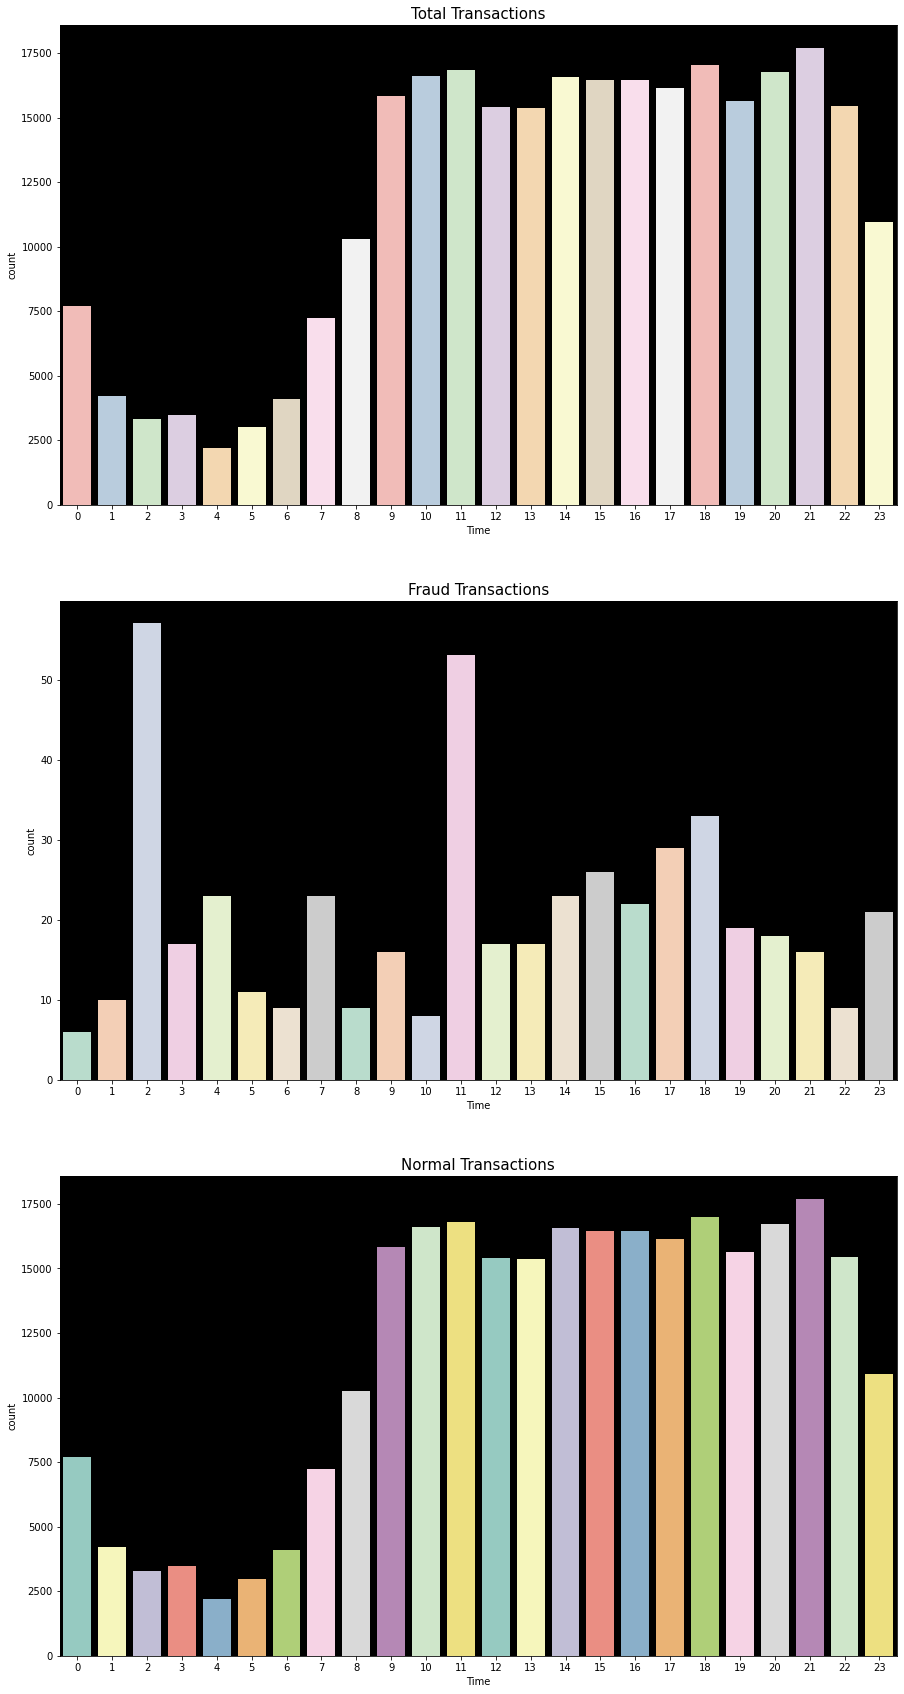

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, figsize = (15, 30))

sns.countplot(x = DF['Time'], 
              ax = axs[0], 
              palette = 'Pastel1')
axs[0].set_title('Total Transactions', 
                 fontsize = 15)
axs[0].set_facecolor("black")

sns.countplot(x = DF[(DF['Class'] == 1)]['Time'], 
              ax = axs[1], 
              palette = 'Pastel2')
axs[1].set_title('Fraud Transactions', 
                 fontsize = 15)
axs[1].set_facecolor('black')

sns.countplot(x= DF[(DF['Class'] == 0)]['Time'], 
              ax = axs[2], 
              palette = 'Set3')
axs[2].set_title('Normal Transactions', 
                 fontsize = 15)
axs[2].set_facecolor("black")

plt.show()

> ## 4) train_test_split( )

> ### (1) X (Input), y (Output) 지정

In [ ]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 30), (284807,))

> ### (2) With 'stratify'

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 30), (199364,), (85443, 30), (85443,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [ ]:
print('Train_Data :','\n', y_train.value_counts(normalize = True))
print()
print('Test_Data :','\n', y_test.value_counts(normalize = True))

Train_Data : 
 0    0.998275
1    0.001725
Name: Class, dtype: float64

Test_Data : 
 0    0.998268
1    0.001732
Name: Class, dtype: float64


# III. Modeling - Decison Tree

> ## 1) Without SMOTE

> ### (1) Model 학습

In [ ]:
%%time

from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train, y_train)

CPU times: user 21.7 s, sys: 55.3 ms, total: 21.8 s
Wall time: 25.1 s


DecisionTreeClassifier(random_state=2045)

> ### (2) 예측값 생성

In [ ]:
y_hat = Model_dt.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  121,    27],
       [   34, 85261]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99968   0.99960   0.99964     85295
          부정    0.78065   0.81757   0.79868       148

    accuracy                        0.99929     85443
   macro avg    0.89016   0.90858   0.89916     85443
weighted avg    0.99930   0.99929   0.99929     85443



> ### (4) Feature Importance

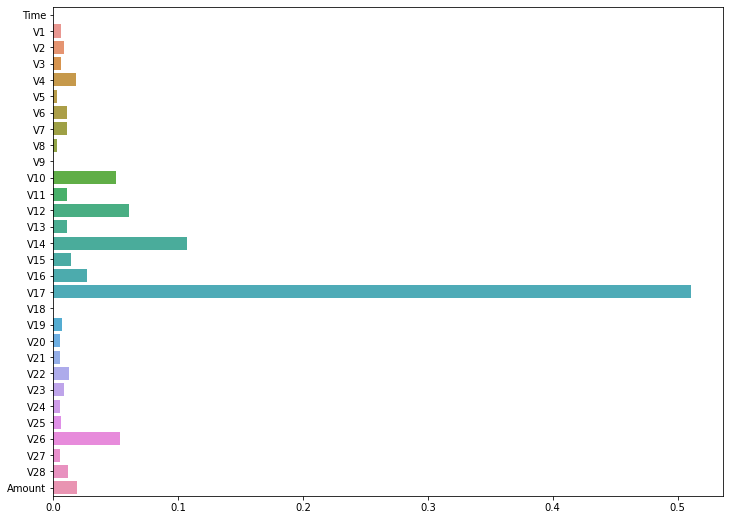

In [ ]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_dt.feature_importances_,
            y = X_train.columns)
plt.show()

> ## 2) SMOTE

* Synthetic Minority Over-sampling TEchnique
* KNN(K-Nearst Neighbor) : K개의 이웃과 일정 값의 차이를 가지를 새로운 데이터를 생성
* imbalanced-learn Package

> ### > (1) Before SMORT

In [ ]:
X_train.shape, y_train.shape

((199364, 30), (199364,))

In [ ]:
pd.Series(y_train).value_counts()

0    199020
1       344
Name: Class, dtype: int64

> ### (2) imbalanced-learn Package

In [ ]:
from imblearn.over_sampling import SMOTE 

> ### (3) After SMOTE

In [ ]:
%%time

OS = SMOTE(random_state = 2045)

X_train_OS, y_train_OS = OS.fit_resample(X_train, y_train)

CPU times: user 266 ms, sys: 206 ms, total: 472 ms
Wall time: 374 ms


In [ ]:
X_train_OS.shape, y_train_OS.shape

((398040, 30), (398040,))

* 0 (정상) Class와 1 (사기) Class 개수

In [ ]:
pd.Series(y_train_OS).value_counts()

0    199020
1    199020
Name: Class, dtype: int64

> ## 3) With SMOTE

> ### (1) Model 학습

In [ ]:
%%time 

from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train_OS, y_train_OS)

CPU times: user 36.4 s, sys: 59.1 ms, total: 36.5 s
Wall time: 36.5 s


DecisionTreeClassifier(random_state=2045)

> ### (2) 예측값 생성

In [ ]:
y_hat = Model_dt.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  123,    25],
       [  174, 85121]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99971   0.99796   0.99883     85295
          부정    0.41414   0.83108   0.55281       148

    accuracy                        0.99767     85443
   macro avg    0.70692   0.91452   0.77582     85443
weighted avg    0.99869   0.99767   0.99806     85443



> ### (4) Feature Importance

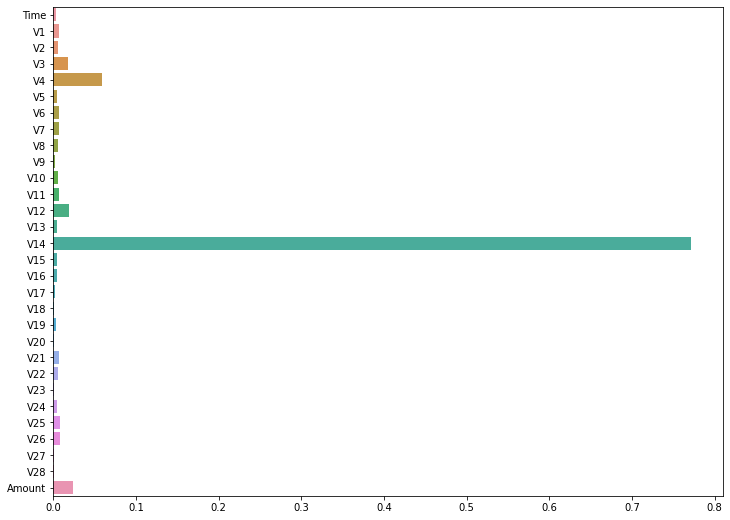

In [ ]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_dt.feature_importances_,
            y = X_train.columns)
plt.show()

# IV. Modeling - RandomForest

> ## 1) Without SMOTE

* 약 4분

> ### (1) Model 학습

In [ ]:
%%time

from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier(random_state = 2045)
Model_rf.fit(X_train, y_train)

CPU times: user 3min 23s, sys: 182 ms, total: 3min 23s
Wall time: 3min 23s


RandomForestClassifier(random_state=2045)

> ### (2) 예측값 생성

In [ ]:
y_hat = Model_rf.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  124,    24],
       [   11, 85284]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99972   0.99987   0.99979     85295
          부정    0.91852   0.83784   0.87633       148

    accuracy                        0.99959     85443
   macro avg    0.95912   0.91885   0.93806     85443
weighted avg    0.99958   0.99959   0.99958     85443



> ### (4) Feature Importance

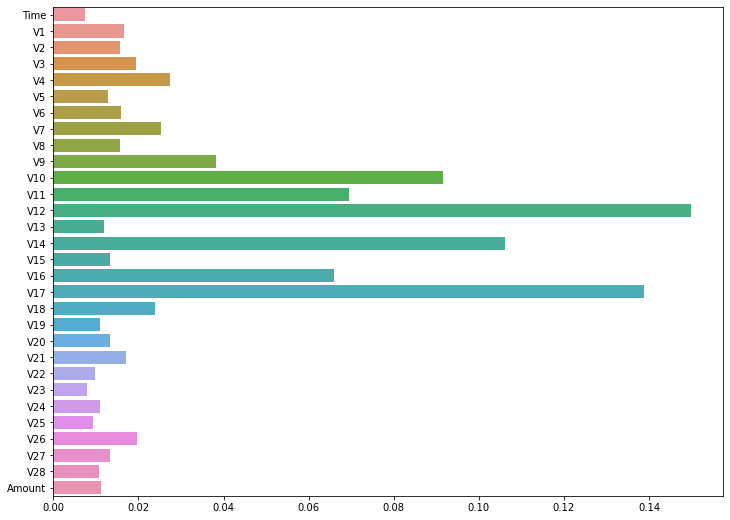

In [ ]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_rf.feature_importances_,
            y = X_train.columns)
plt.show()

> ## 2) With SMOTE

* 약 6분

> ### (1) Model 학습

In [ ]:
%%time 

from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier(random_state = 2045)
Model_rf.fit(X_train_OS, y_train_OS)

CPU times: user 5min 51s, sys: 315 ms, total: 5min 51s
Wall time: 5min 51s


RandomForestClassifier(random_state=2045)

> ### (2) 예측값 생성

In [ ]:
y_hat = Model_rf.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  131,    17],
       [   18, 85277]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99980   0.99979   0.99979     85295
          부정    0.87919   0.88514   0.88215       148

    accuracy                        0.99959     85443
   macro avg    0.93950   0.94246   0.94097     85443
weighted avg    0.99959   0.99959   0.99959     85443



> ### (4) Feature Importance

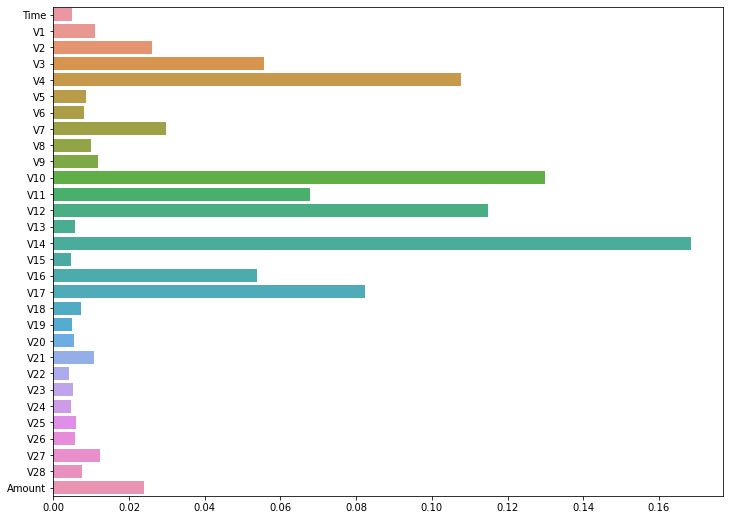

In [ ]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_rf.feature_importances_,
            y = X_train.columns)
plt.show()

# V. Modeling - Adaptive Boosting

> ## 1) Without SMOTE

* 약 2분

> ### (1) Model 학습

In [ ]:
%%time

from sklearn.ensemble import AdaBoostClassifier

Model_ab = AdaBoostClassifier(random_state = 2045)
Model_ab.fit(X_train, y_train)

CPU times: user 59.6 s, sys: 77.6 ms, total: 59.6 s
Wall time: 59.7 s


AdaBoostClassifier(random_state=2045)

> ### (2) 예측값 생성

In [ ]:
y_hat = Model_ab.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  113,    35],
       [   29, 85266]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99959   0.99966   0.99962     85295
          부정    0.79577   0.76351   0.77931       148

    accuracy                        0.99925     85443
   macro avg    0.89768   0.88159   0.88947     85443
weighted avg    0.99924   0.99925   0.99924     85443



> ### (4) Feature Importance

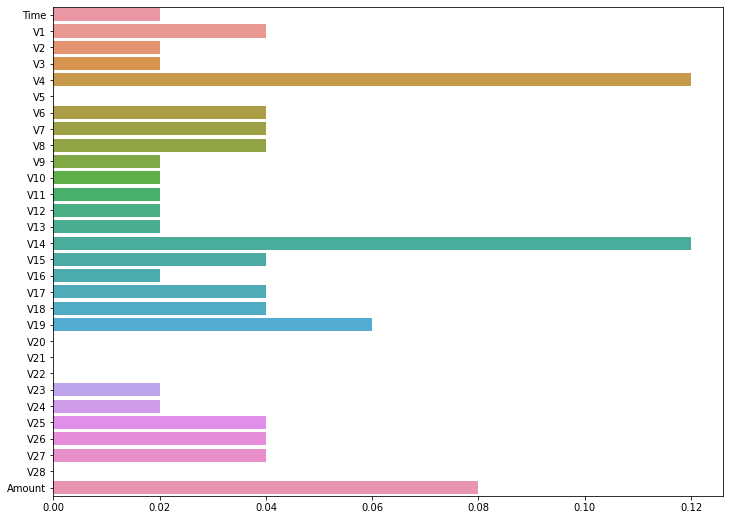

In [ ]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_ab.feature_importances_,
            y = X_train.columns)
plt.show()

> ## 2) With SMOTE

* 약 3분

> ### (1) Model 학습

In [ ]:
%%time 

from sklearn.ensemble import AdaBoostClassifier

Model_ab = AdaBoostClassifier(random_state = 2045)
Model_ab.fit(X_train_OS, y_train_OS)

CPU times: user 2min 13s, sys: 606 ms, total: 2min 14s
Wall time: 2min 14s


AdaBoostClassifier(random_state=2045)

> ### (2) 예측값 생성

In [ ]:
y_hat = Model_ab.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  135,    13],
       [ 1647, 83648]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99984   0.98069   0.99017     85295
          부정    0.07576   0.91216   0.13990       148

    accuracy                        0.98057     85443
   macro avg    0.53780   0.94643   0.56504     85443
weighted avg    0.99824   0.98057   0.98870     85443



> ### (4) Feature Importance

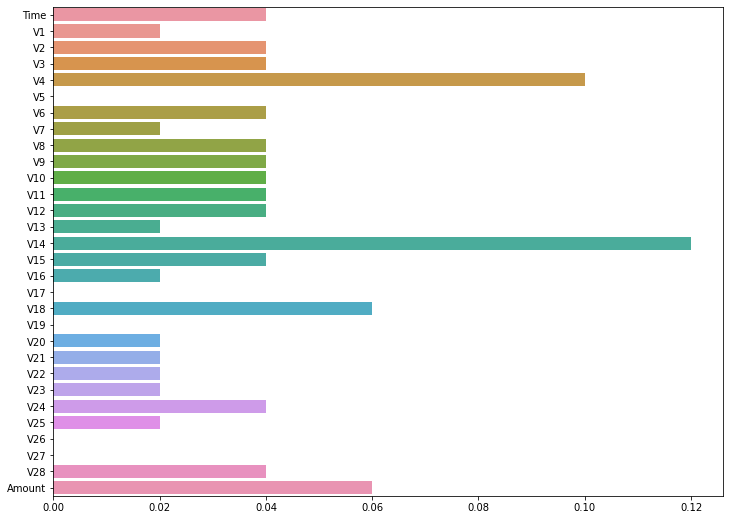

In [ ]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_ab.feature_importances_,
            y = X_train.columns)
plt.show()

# VI. Modeling - Gradient Boosting Machine (GBM)

> ## 1) Without SMOTE

* 약 6분

> ### (1) Model 학습

In [ ]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

Model_gbm = GradientBoostingClassifier(random_state = 2045)
Model_gbm.fit(X_train, y_train)

CPU times: user 5min 10s, sys: 216 ms, total: 5min 10s
Wall time: 5min 9s


GradientBoostingClassifier(random_state=2045)

> ### (2) 예측값 생성

In [ ]:
y_hat = Model_gbm.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[   94,    54],
       [   28, 85267]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99937   0.99967   0.99952     85295
          부정    0.77049   0.63514   0.69630       148

    accuracy                        0.99904     85443
   macro avg    0.88493   0.81740   0.84791     85443
weighted avg    0.99897   0.99904   0.99899     85443



> ### (4) Feature Importance

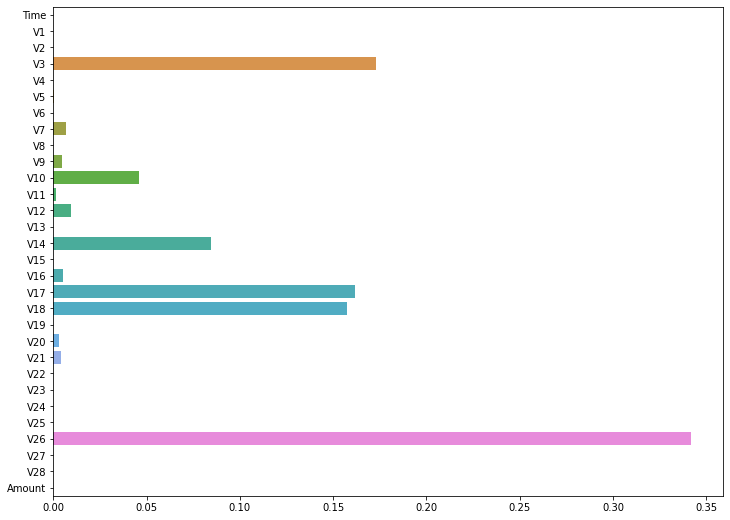

In [ ]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_gbm.feature_importances_,
            y = X_train.columns)
plt.show()

> ## 2) With SMOTE

* 약 3분

> ### (1) Model 학습

In [ ]:
%%time 

from sklearn.ensemble import GradientBoostingClassifier

Model_gbm = AdaBoostClassifier(random_state = 2045)
Model_gbm.fit(X_train_OS, y_train_OS)

CPU times: user 2min 11s, sys: 669 ms, total: 2min 12s
Wall time: 2min 12s


AdaBoostClassifier(random_state=2045)

> ### (2) 예측값 생성

In [ ]:
y_hat = Model_gbm.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  135,    13],
       [ 1647, 83648]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99984   0.98069   0.99017     85295
          부정    0.07576   0.91216   0.13990       148

    accuracy                        0.98057     85443
   macro avg    0.53780   0.94643   0.56504     85443
weighted avg    0.99824   0.98057   0.98870     85443



> ### (4) Feature Importance

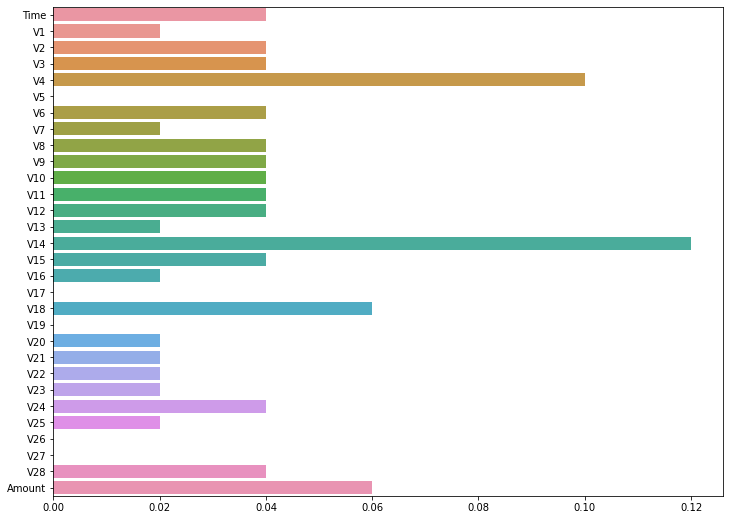

In [ ]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_gbm.feature_importances_,
            y = X_train.columns)
plt.show()

# VII. Modeling - LightGBM

> ## 1) Without SMOTE

> ### (1) Model 학습

In [ ]:
%%time

from lightgbm import LGBMClassifier

Model_lgbm = LGBMClassifier(random_state = 2045)
Model_lgbm.fit(X_train, y_train)

CPU times: user 5.53 s, sys: 165 ms, total: 5.69 s
Wall time: 3.53 s


LGBMClassifier(random_state=2045)

> ### (2) 예측값 생성

In [ ]:
y_hat = Model_lgbm.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[   84,    64],
       [  999, 84296]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99924   0.98829   0.99373     85295
          부정    0.07756   0.56757   0.13647       148

    accuracy                        0.98756     85443
   macro avg    0.53840   0.77793   0.56510     85443
weighted avg    0.99764   0.98756   0.99225     85443



> ### (4) Feature Importance

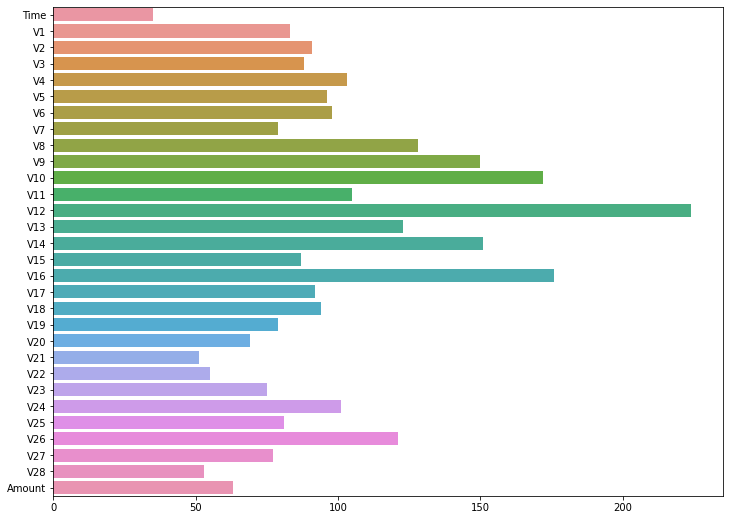

In [ ]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_lgbm.feature_importances_,
            y = X_train.columns)
plt.show()

> ## 2) With SMOTE

> ### (1) Model 학습

In [ ]:
%%time

from lightgbm import LGBMClassifier

Model_lgbm = LGBMClassifier(random_state = 2045)

Model_lgbm.fit(X_train_OS, y_train_OS)

CPU times: user 13.6 s, sys: 154 ms, total: 13.8 s
Wall time: 7.88 s


LGBMClassifier(random_state=2045)

> ### (2) 예측값 생성

In [ ]:
y_hat = Model_lgbm.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  128,    20],
       [   85, 85210]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99977   0.99900   0.99938     85295
          부정    0.60094   0.86486   0.70914       148

    accuracy                        0.99877     85443
   macro avg    0.80035   0.93193   0.85426     85443
weighted avg    0.99907   0.99877   0.99888     85443



> ### (4) Feature Importance

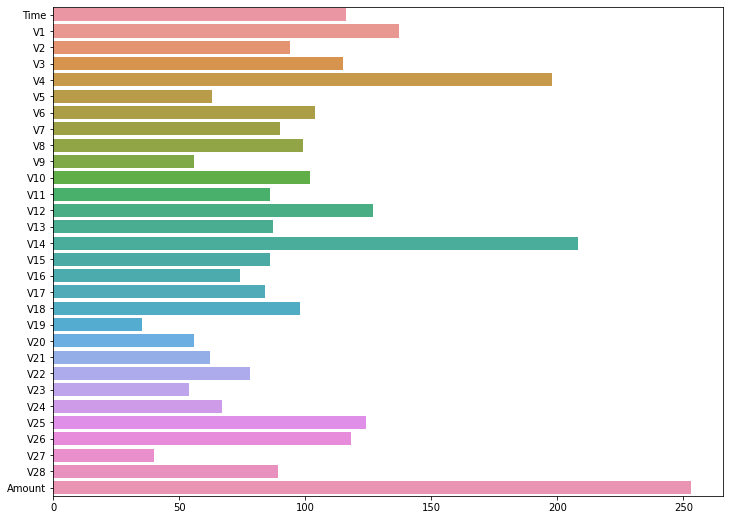

In [ ]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_lgbm.feature_importances_,
            y = X_train.columns)
plt.show()

# VIII. Modeling - eXtra Gradient Boost (XGBoost)

> ## 1) Without SMOTE

> ### (1) Model 학습

In [ ]:
%%time

from xgboost import XGBClassifier

Model_xgb = XGBClassifier(random_state = 2045)
Model_xgb.fit(X_train, y_train)

CPU times: user 2min 10s, sys: 209 ms, total: 2min 10s
Wall time: 1min 11s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2045, ...)

> ### (2) 예측값 생성

In [ ]:
y_hat = Model_xgb.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  124,    24],
       [   10, 85285]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99972   0.99988   0.99980     85295
          부정    0.92537   0.83784   0.87943       148

    accuracy                        0.99960     85443
   macro avg    0.96255   0.91886   0.93962     85443
weighted avg    0.99959   0.99960   0.99959     85443



> ### (4) Feature Importance

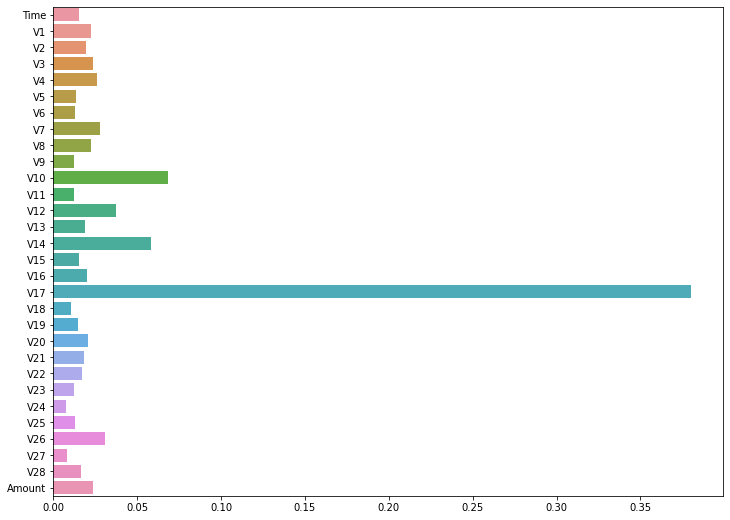

In [ ]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_xgb.feature_importances_,
            y = X_train.columns)
plt.show()

> ## 2) With SMOTE

* 약 2분

> ### (1) Model 학습

In [ ]:
%%time

from xgboost import XGBClassifier

Model_xgb = XGBClassifier(random_state = 2045)

Model_xgb.fit(X_train_OS, y_train_OS)

CPU times: user 6min 1s, sys: 405 ms, total: 6min 1s
Wall time: 3min 18s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2045, ...)

> ### (2) 예측값 생성

In [ ]:
y_hat = Model_xgb.predict(X_test)

> ### (3) Model 평가

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  131,    17],
       [   30, 85265]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99980   0.99965   0.99972     85295
          부정    0.81366   0.88514   0.84790       148

    accuracy                        0.99945     85443
   macro avg    0.90673   0.94239   0.92381     85443
weighted avg    0.99948   0.99945   0.99946     85443



> ### (4) Feature Importance

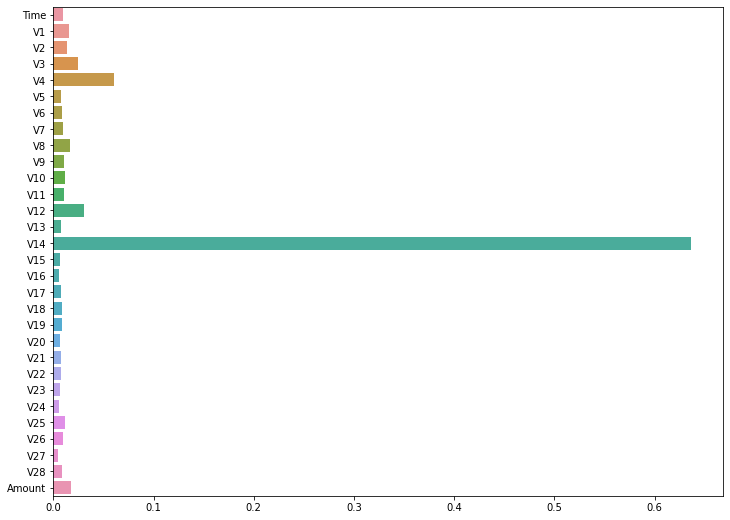

In [ ]:
plt.figure(figsize = (12, 9))
sns.barplot(x = Model_xgb.feature_importances_,
            y = X_train.columns)
plt.show()

# IX. Modeling - K-Nearest Neighbors (K-NN)

> ## 1) Without SMOTE

> ### (1) Model 학습

In [ ]:
%%time

from sklearn.neighbors import KNeighborsClassifier

Model_knn = KNeighborsClassifier(n_neighbors = 3)
Model_knn.fit(X_train, y_train)

CPU times: user 29.6 ms, sys: 4.99 ms, total: 34.6 ms
Wall time: 36.7 ms


KNeighborsClassifier(n_neighbors=3)

> ### (2) 예측값 생성

* 약 5분

In [ ]:
%%time

y_hat = Model_knn.predict(X_test)

CPU times: user 2min 47s, sys: 195 ms, total: 2min 47s
Wall time: 1min 32s


> ### (3) Model 평가

* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = [1, 0])

array([[  101,    47],
       [    7, 85288]])

* Scores

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['정상', '부정'],
                            digits = 5))

              precision    recall  f1-score   support

          정상    0.99945   0.99992   0.99968     85295
          부정    0.93519   0.68243   0.78906       148

    accuracy                        0.99937     85443
   macro avg    0.96732   0.84118   0.89437     85443
weighted avg    0.99934   0.99937   0.99932     85443



# 
# 
# 
# The End
# 
# 
# 